In [200]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

95000 5000
90000
0.12255659878566127 0.12922367022380504


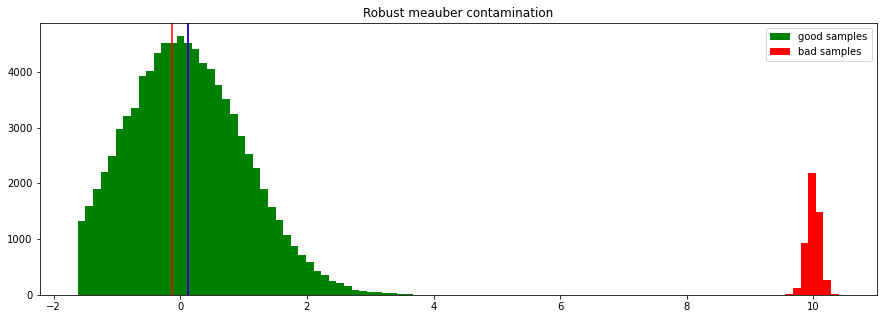

mean(S) =    0.6351853602277459
median(S) =  0.12922367022380504


In [406]:
N = 100000
eps = 0.05

Ng = round(N*(1-eps))
Nb = N - Ng
print(Ng, Nb)


Sg = np.random.normal(0,1,Ng)

q_plus  = np.quantile(Sg, 0.5+eps)
q_minus = np.quantile(Sg, 0.5-eps)

Sb = np.random.normal(10,0.1,Nb)
# Remove eps-fraction of the smallest points
Sg = np.sort(Sg)[Nb:]
print(len(Sg))
S = np.hstack((Sg,Sb))

bins = np.histogram(S, bins=100)[1] #get the bin edges


print(q_plus, np.median(S))

plt.figure(figsize=(15,5))
plt.hist(Sg, bins, color='g', label='good samples')
plt.hist(Sb, bins, color='r', label='bad samples')
plt.axvline(x=q_plus, color='r')
plt.axvline(x=q_minus, color='r')
plt.axvline(x=np.median(S), color='b')
plt.title('Robust meauber contamination')
plt.legend()
plt.show()

print('mean(S) =   ', np.mean(S))
print('median(S) = ', np.median(S))

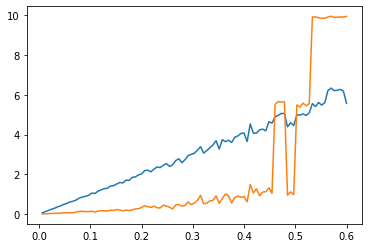

[14.25089858 -2.24408632]
2.5066282746310002


In [263]:
# use median
delta = 0.01

num_trials = 10

eps_list = np.linspace(0,0.6,100)[1:]
num_eps = len(eps_list)

medians = np.zeros(num_eps)
means = np.zeros(num_eps)
Ns = np.zeros(num_eps)

for i in range(len(eps_list)):
    
    eps = eps_list[i]
    N = round(np.log(2/delta)/(2*eps**2))
    Ng = round(N*(1-eps))
    Nb = N - Ng
    
    Ns[i]=N
    
    mean_total = 0
    median_total = 0
    
    for j in range(num_trials):
        Sg = np.random.normal(0,1,Ng)
        Sb = np.random.normal(10,0.1,Nb)

        S = np.hstack((Sg,Sb))
        
        mean_total += np.mean(S)
        median_total += np.median(S)

    means[i] = mean_total/num_trials
    medians[i] = median_total/num_trials
    

# t = 2*np.sqrt(2*np.pi)*eps_list
# exponent = -2*N*(norm.cdf(t) - 0.5 - eps_list)**2
# exponent = -2*N*eps_list**2
# bound = np.exp(exponent)

# Note that the error |med(S) - mu| = O(epsilon) for epsilon sufficiently close to 0.
# Things break down once epsilon approaches 1/2
plt.plot(eps_list, means)
plt.plot(eps_list, medians)
# plt.plot(eps_list, bound)
# plt.plot(eps_list, t)
plt.show()

print(np.polyfit(eps_list, medians, 1))
print(np.sqrt(2*np.pi))

6931


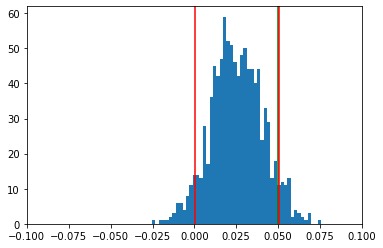

0.02541051065953254
0.015486415117109263
prob of error > t : 0.8942349790003602


In [484]:
def test(N, num_trials, eps):

    means = np.zeros(num_trials)
    medians = np.zeros(num_trials)
    
    q_eps_plus = np.zeros(num_trials)
    q_eps_minus = np.zeros(num_trials)

    Ng = round(N*(1-eps))
    Nb = N - Ng

    for j in range(num_trials):
        Sg = np.random.normal(0,1,Ng)
        Sb = np.random.normal(10,0.1,Nb)
        # Remove eps-fraction of the smallest points
        Sg = np.sort(Sg)[Nb:]
        S = np.hstack((Sg,Sb))

        means[j] = np.mean(S)
        medians[j] = np.median(S)
        q_eps_plus[j] = np.quantile(S, 0.5+eps)
        q_eps_minus[j] = np.quantile(S, 0.5-eps)

        
    mu_hat = np.mean(medians)
    var_hat = np.var(medians)
    stdev = np.sqrt(var_hat)
    
    avg_q_plus = np.mean(q_eps_plus)
    avg_q_minus = np.mean(q_eps_minus)
    
    
    vals = np.random.normal(mu_hat,stdev,500)
    
    b = np.linspace(-0.1, 0.1, 100)
    
    
#     plt.hist(q_eps_minus, bins=b)
#     plt.hist(q_eps_plus, bins=b)
    plt.hist(medians, bins=b)
#     plt.hist(vals, bins=b)
    plt.axvline(x=2*np.sqrt(2*np.pi)*eps, color='g')
    plt.axvline(x=avg_q_plus, color='r')
    plt.axvline(x=avg_q_minus, color='r')
    plt.xlim(-0.1,.1)
    plt.show()
    
    z = (medians-np.mean(medians))/np.sqrt(var_hat)
    
#     plt.hist(z, bins=40)
#     plt.axvline(x=2*np.sqrt(2*np.pi)*eps/np.sqrt(var_hat), color='r')
#     plt.xlim(-10,10)
#     plt.show()

    print(mu_hat)
    print(np.sqrt(var_hat))

    t = 2*np.sqrt(2*np.pi)*eps
    zplus = (avg_q_plus-mu_hat)/np.sqrt(var_hat)
    zminus = (avg_q_minus-mu_hat)/np.sqrt(var_hat)

    print('prob of error > t :', norm.cdf(zplus)-norm.cdf(zminus))
#     res = np.sum(medians-avg_q_plus > 0) + np.sum(avg_q_minus-medians > 0)
#     print('res', res)
    
eps = 0.01
delta = 0.5
N = int(np.log(2/delta)/(2*eps**2))

print(N)

test(N, 1000, eps)


In [465]:
def b(t, eps):
    return norm.cdf(t) - 0.5 - eps

def e(N, t, eps):
    print(b(t,eps))
    return 2*np.exp(-2*N*b(t,eps)**2)

e(15000, 2*np.sqrt(2*np.pi)*2*0.2, 0.1)

0.37753464753024935


0.0